In [4]:
#installing scikit image processing libraries
!pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 105.6 kB/s eta 0:00:0000:0100:04
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.3/210.3 kB 141.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 92.4 kB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 86.4 kB/s eta 0:00:0000:0100:02m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 98.2 kB/s eta 0:00:0000:0100:01m
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/us

In [3]:
#loading necessary library
import os
import numpy as np
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

#using sci-kit image processing libraries for image processing
from skimage.filters import gaussian
from skimage.util import random_noise
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split


#importing tensorflow for network model creation
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D,Dropout,MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

2022-11-19 00:12:51.429328: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# accsessing the data files and directory
cancer_rays_dir     = os.listdir("Downloads//archive//IDC_regular_ps50_idx5") 
all_rays_dir        = "Downloads//all_rays_dir"  # is this path we will put all the images
cancer_rays_dir_str ="Downloads//archive//IDC_regular_ps50_idx5/"

In [5]:
#printing folders in the dataset directory
print(f'Cancer dataset folders in the dataset directory:\n\n{cancer_rays_dir}\n\n')
print(f'The count of folders in the directory: {len(cancer_rays_dir)}\n\nWe can see 279 folder for each patient named with their id, and each file contains x-ray images of its owner')

Cancer dataset folders in the dataset directory:

['9036', '10268', '10257', '8913', '13613', '8914', '15510', '10259', '16165', '10292', '12951', '10261', '10295', '9259', '12750', '13020', '16552', '12905', '9266', '16555', '13018', '9261', '9257', '12934', '12933', '9250', '10260', '10258', '10293', '9037', '10269', '16531', '10256', '15516', '12932', '12935', '9256', '16554', '9260', '13019', '16553', '13021', '8984', '9258', '12751', '9267', '12876', '12882', '15634', '12871', '14188', '15633', '9324', '12878', '.DS_Store', '9323', '9383', '8867', '9346', '9174', '12822', '9173', '9322', '9325', '12879', '14189', '12870', '12884', '12241', '15632', '12883', '12877', '9126', '13106', '12823', '13591', '9175', '12824', '9347', '9181', '9382', '10307', '13916', '10300', '14306', '15471', '16896', '14156', '9135', '12890', '12897', '10308', '10301', '10306', '12896', '14157', '12891', '12898', '14192', '13458', '9083', '9077', '13460', '8955', '12910', '9041', '14210', '14082', '10274

In [7]:
#To facilitate the process of dealing with screening mammograms images, we will 
#collect all the images in one place, while 
#retaining ownership of each image and its class as well
os.mkdir(all_rays_dir)
all_rays_dir_lst = os.listdir('Downloads//all_rays_dir')

In [22]:
for patient in cancer_rays_dir:   
    path_0 = cancer_rays_dir_str + str(patient) + '/0'
    path_1 = cancer_rays_dir_str + str(patient) + '/1'
    file_list_0 = os.listdir(path_0)   
    file_list_1 = os.listdir(path_1)
    for fname in file_list_0:
            src = os.path.join(path_0, fname)
            dst = os.path.join(all_rays_dir, fname)
            shutil.copyfile(src, dst)
    for fname in file_list_1:
        src = os.path.join(path_1, fname)
        dst = os.path.join(all_rays_dir, fname)
        shutil.copyfile(src, dst)

In [8]:
print(f"Total images copied and prepared is: {len(os.listdir('Downloads//all_rays_dir'))}")

Total images copied and prepared is: 277524


In [9]:
#puting images in a data_frame for easy access
data = pd.DataFrame(os.listdir('Downloads//all_rays_dir'), columns=['image_id'])
data.head()

image_id
0   10286_idx5_x1251_y351_class1.png
1  14079_idx5_x2151_y1401_class0.png
2   12749_idx5_x1451_y701_class0.png
3   14157_idx5_x1651_y301_class0.png
4   10269_idx5_x1351_y651_class1.png

In [10]:
#This function extracts the target label from the image, we are going to use this 
#target to predict the class of the image 
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target


#applying the extract_target function and creating another column called 'target'
data['target'] = data['image_id'].apply(extract_target)

#displaying the first ten (10) data
data.head(10)

image_id target
0   10286_idx5_x1251_y351_class1.png      1
1  14079_idx5_x2151_y1401_class0.png      0
2   12749_idx5_x1451_y701_class0.png      0
3   14157_idx5_x1651_y301_class0.png      0
4   10269_idx5_x1351_y651_class1.png      1
5    9266_idx5_x1901_y701_class0.png      0
6  13693_idx5_x1901_y2851_class0.png      0
7  13022_idx5_x1501_y1001_class0.png      0
8  10307_idx5_x1351_y1801_class1.png      1
9  15510_idx5_x1801_y1001_class0.png      0

In [90]:
#This function extracts the patient id from the image
def extract_patient_id(x):
    # split into a list
    a = x.split('_')
    patient_id = a[0]
    
    return patient_id

#applying the extract_patient_id function and creating another column called 'patient_id'
data['patient_id'] = data['image_id'].apply(extract_patient_id)

#displaying the first ten (10) data
data.head(10)

image_id  target patient_id
0   10286_idx5_x1251_y351_class1.png       1      10286
1  14079_idx5_x2151_y1401_class0.png       0      14079
2   12749_idx5_x1451_y701_class0.png       0      12749
3   14157_idx5_x1651_y301_class0.png       0      14157
4   10269_idx5_x1351_y651_class1.png       1      10269
5    9266_idx5_x1901_y701_class0.png       0       9266
6  13693_idx5_x1901_y2851_class0.png       0      13693
7  13022_idx5_x1501_y1001_class0.png       0      13022
8  10307_idx5_x1351_y1801_class1.png       1      10307
9  15510_idx5_x1801_y1001_class0.png       0      15510

In [12]:
data['target'].value_counts()

0    198738
1     78786
Name: target, dtype: int64

/var/folders/5b/92jby7t52fj53dh8mdr0lryr0000gn/T/ipykernel_605/3195598135.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.target = data.target.astype(np.int)


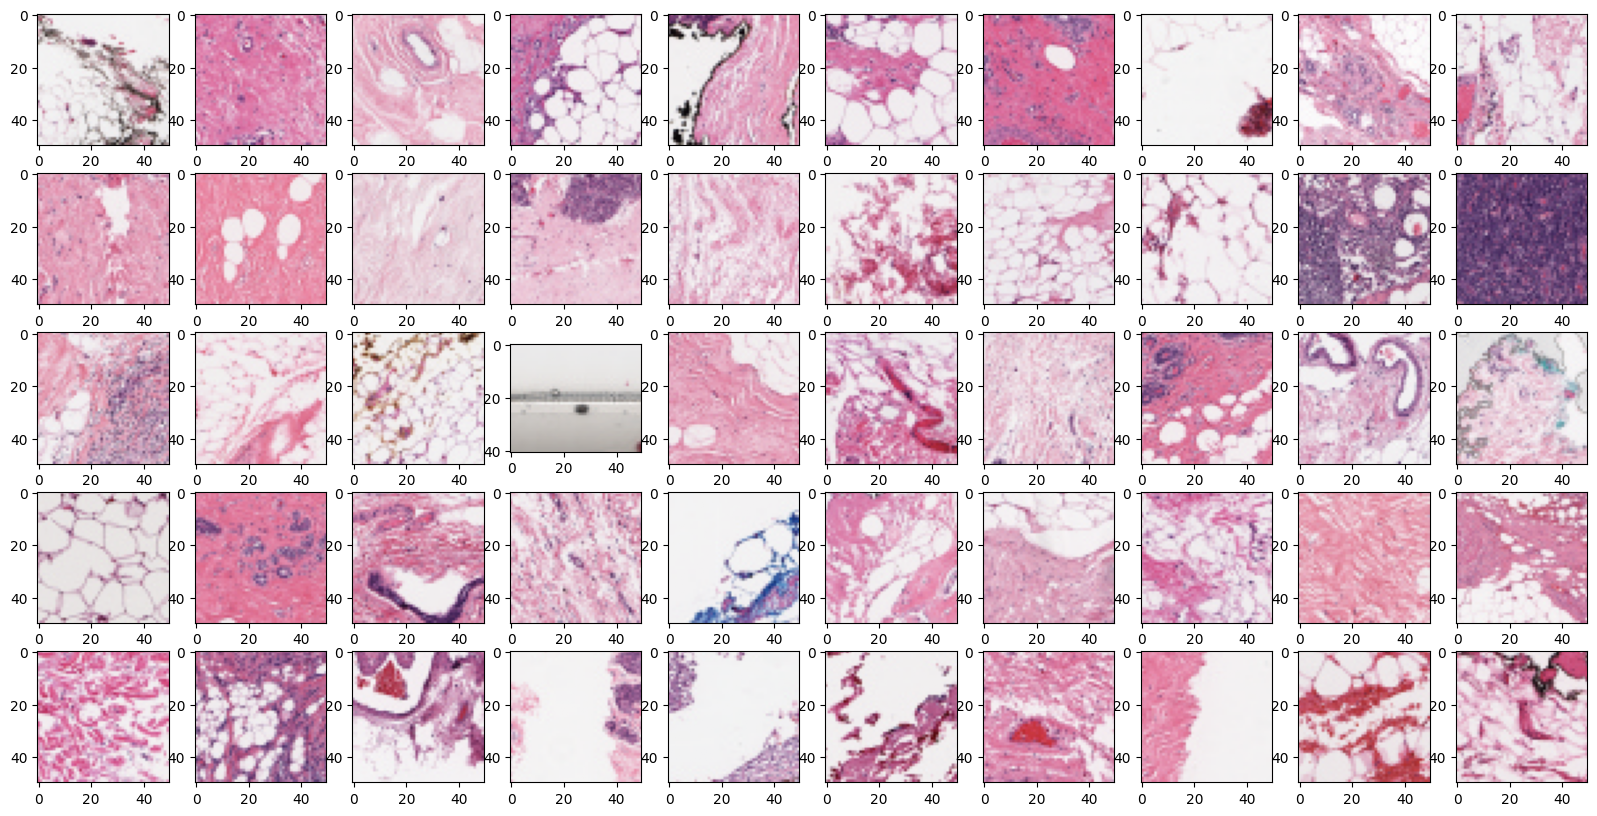

In [13]:
#Displaying Healthy patche images 
data.target = data.target.astype(np.int)
fig, ax = plt.subplots(5,10,figsize=(20,10))
pos_selection = np.random.choice(data[data.target ==1].index, size=50, replace=False,)
neg_selection = np.random.choice(data[data.target ==0].index, size=50, replace=False,)
for n in range(5):
    for m in range(10):
        idx = neg_selection[m + 10*n]
        path =os.path.join(all_rays_dir,data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

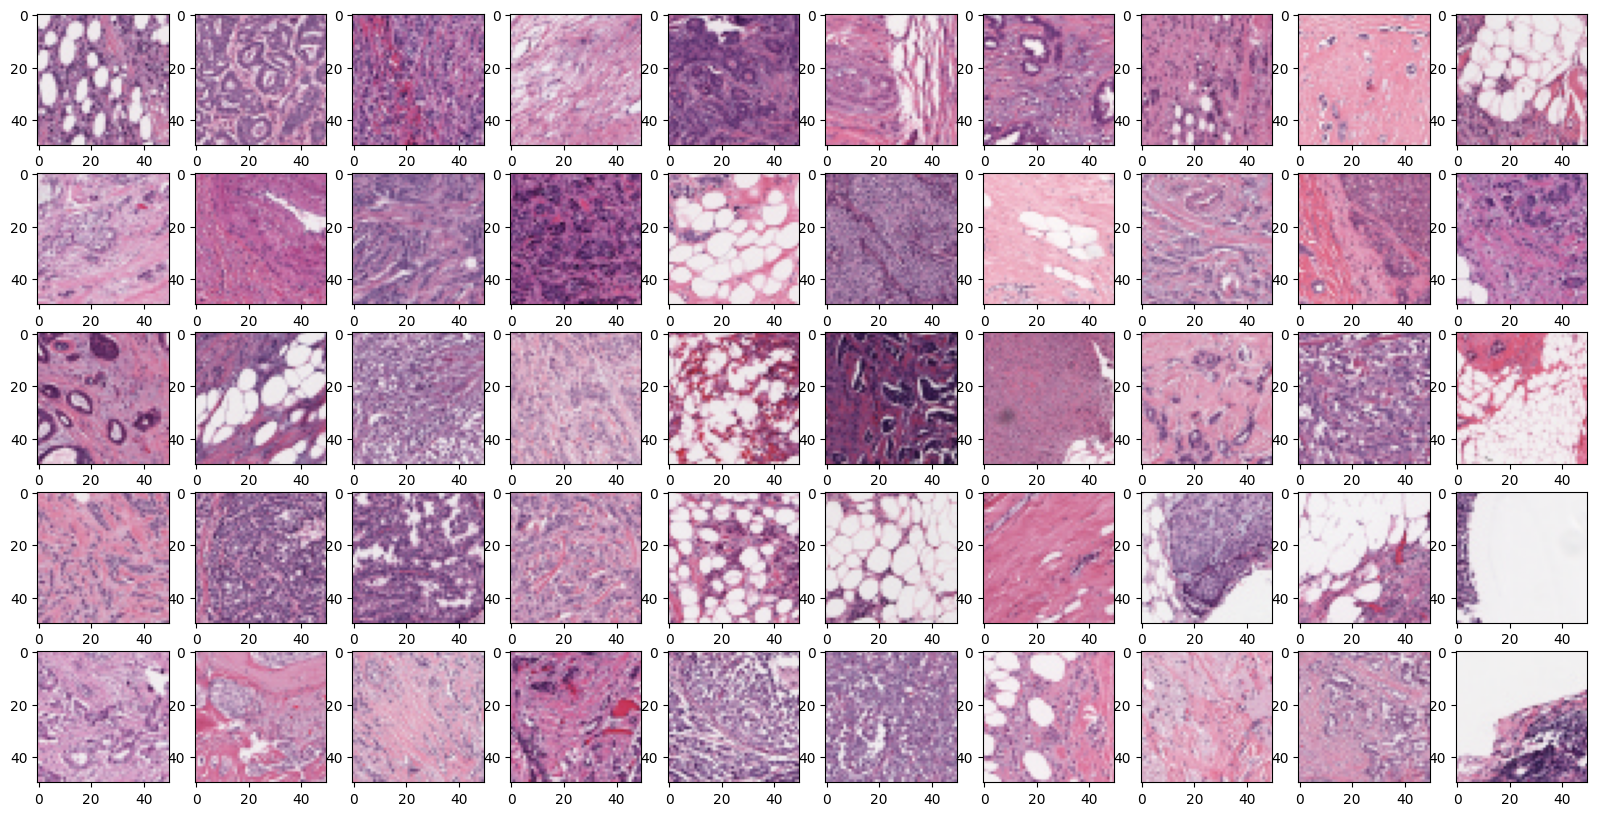

In [14]:
#Displaying Cancer patch images
fig, ax = plt.subplots(5,10,figsize=(20,10))
for n in range(5):
    for m in range(10):
        idx = pos_selection[m + 10*n]
        path =os.path.join(all_rays_dir,data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

In [15]:
cancer_perc = data.groupby("patient_id").target.value_counts()/ data.groupby("patient_id").target.size()
cancer_perc = cancer_perc.unstack()

/var/folders/5b/92jby7t52fj53dh8mdr0lryr0000gn/T/ipykernel_605/1083024112.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.groupby("patient_id").size(), kde=False, bins=30)


Text(0, 0.5, 'Frequency')

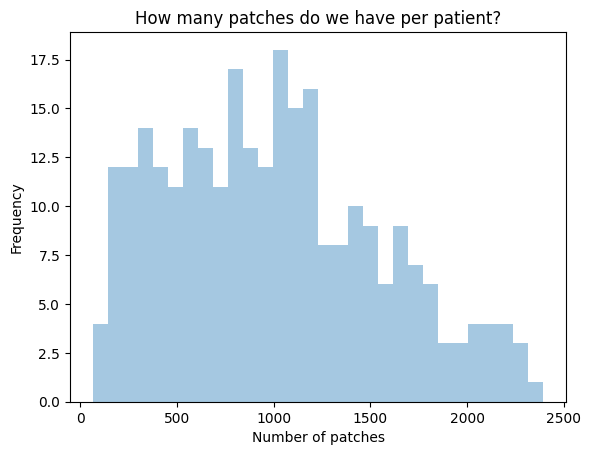

In [16]:
sns.distplot(data.groupby("patient_id").size(), kde=False, bins=30)
plt.title("How many patches do we have per patient?")
plt.xlabel("Number of patches")
plt.ylabel("Frequency") 

/var/folders/5b/92jby7t52fj53dh8mdr0lryr0000gn/T/ipykernel_605/3075742133.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancer_perc.loc[:, 1]*100, color="Tomato", kde=False, bins=30)


Text(0, 0.5, 'Frequency')

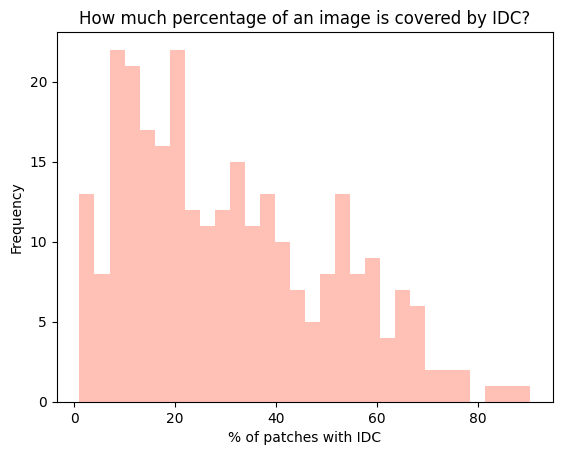

In [17]:
sns.distplot(cancer_perc.loc[:, 1]*100, color="Tomato", kde=False, bins=30)
plt.title("How much percentage of an image is covered by IDC?")
plt.xlabel("% of patches with IDC")
plt.ylabel("Frequency") 

Text(0.5, 1.0, 'How many patches show IDC?')

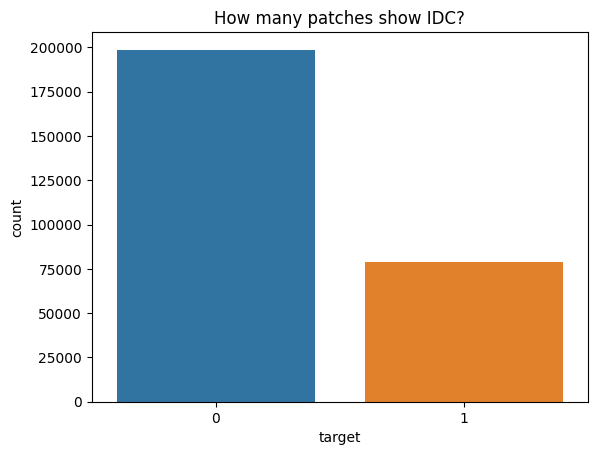

In [18]:
sns.countplot(data = data, x='target')
plt.title("How many patches show IDC?")

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
#this function extracts coordinates from the cancer images
def extract_coords(df):
    coord = df.path.str.rsplit("_", n=4, expand=True)
    coord = coord.drop([0, 1, 4], axis=1)
    coord = coord.rename({2: "x", 3: "y"}, axis=1)
    coord.loc[:, "x"] = coord.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    coord.loc[:, "y"] = coord.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    df.loc[:, "x"] = coord.x.values
    df.loc[:, "y"] = coord.y.values
    return df

def get_cancer_dataframe(patient_id, cancer_id):
    path = cancer_rays_dir_str + patient_id + "/" + cancer_id
    files = os.listdir(path)
    dataframe = pd.DataFrame(files, columns=["filename"])
    path_names = path + "/" + dataframe.filename.values
    dataframe = dataframe.filename.str.rsplit("_", n=4, expand=True)
    dataframe.loc[:, "target"] = np.int(cancer_id)
    dataframe.loc[:, "path"] = path_names
    dataframe = dataframe.drop([0, 1, 4], axis=1)
    dataframe = dataframe.rename({2: "x", 3: "y"}, axis=1)
    dataframe.loc[:, "x"] = dataframe.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    dataframe.loc[:, "y"] = dataframe.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    return dataframe
def get_patient_dataframe(patient_id):
    df_0 = get_cancer_dataframe(patient_id, "0")
    df_1 = get_cancer_dataframe(patient_id, "1")
    patient_df = df_0.append(df_1)
    return patient_df

In [21]:
example = get_patient_dataframe(data.patient_id.values[0])
example.head()

x    y  target                                               path
0  2001  351       0  Downloads//archive//IDC_regular_ps50_idx5/1028...
1  1201  951       0  Downloads//archive//IDC_regular_ps50_idx5/1028...
2  1051  901       0  Downloads//archive//IDC_regular_ps50_idx5/1028...
3  2001  451       0  Downloads//archive//IDC_regular_ps50_idx5/1028...
4  1751  501       0  Downloads//archive//IDC_regular_ps50_idx5/1028...

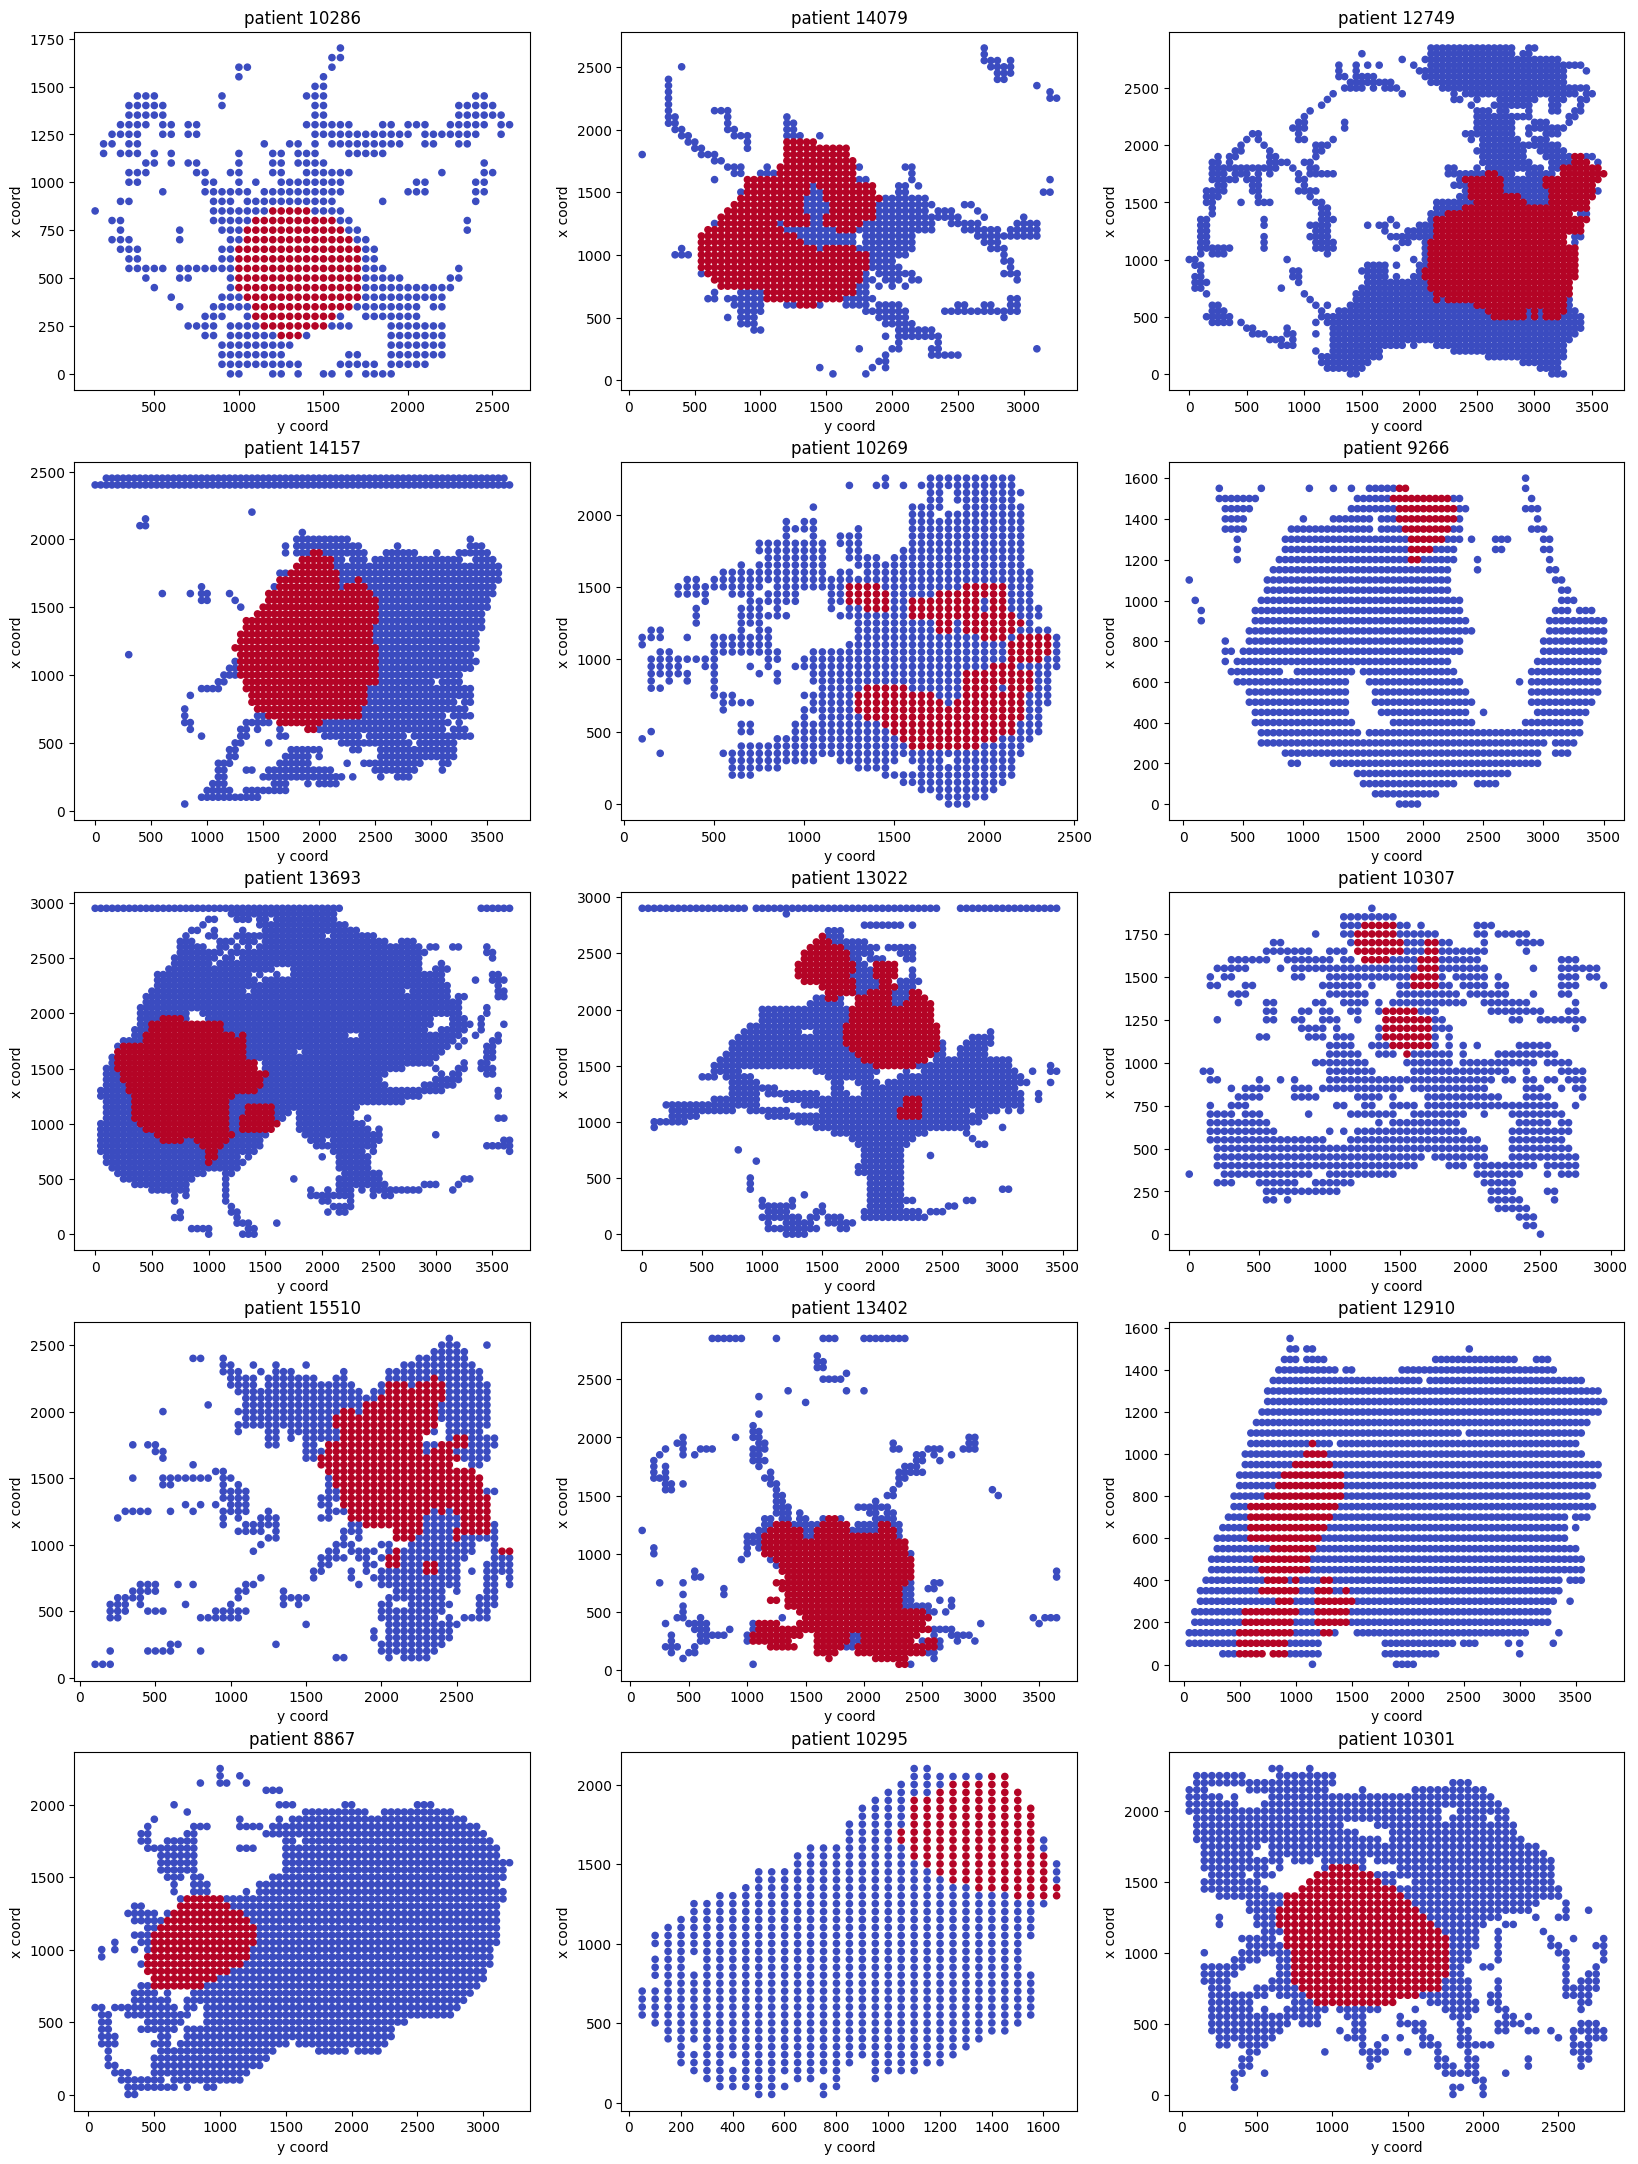

In [22]:
#Next, we take a closer look at the shape of the patches and their 
#distribution in each mammogram using Binary objective visualization for each tissue slice
fig, ax = plt.subplots(5,3,figsize=(20, 27))

patient_ids = data.patient_id.unique()

for n in range(5):
    for m in range(3):
        patient_id = patient_ids[m + 3*n]
        example_df = get_patient_dataframe(patient_id)
        
        ax[n,m].scatter(example_df.x.values, example_df.y.values, c=example_df.target.values, cmap="coolwarm", s=20);
        ax[n,m].set_title("patient " + patient_id)
        ax[n,m].set_xlabel("y coord")
        ax[n,m].set_ylabel("x coord")

In [23]:
#image processing

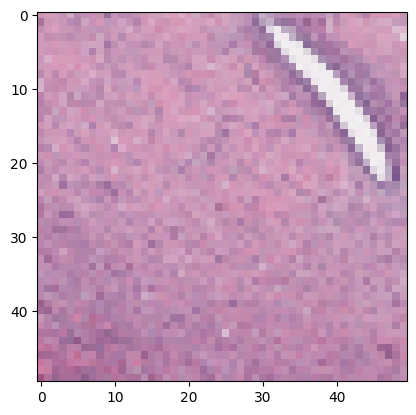

In [24]:
import random

data.target = data.target.astype(np.int)
random_image_path = np.random.choice(data[data.target ==0].index, size=1, replace=False,)
path =os.path.join(all_rays_dir,data.loc[random.randint(0,277523), 'image_id'])
image = mpimg.imread(path)
plt.imshow(image)

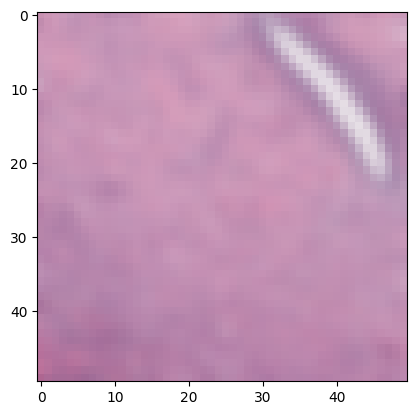

In [25]:
gaussian_image = gaussian(image)
plt.imshow(gaussian_image)

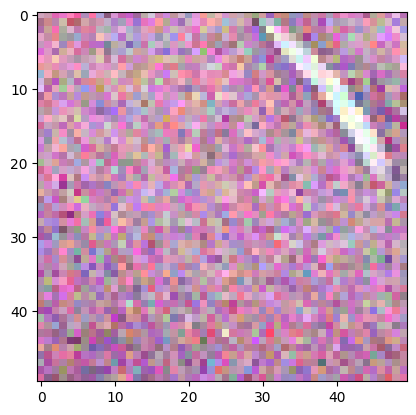

In [26]:
noise_image = random_noise(image)
plt.imshow(noise_image)

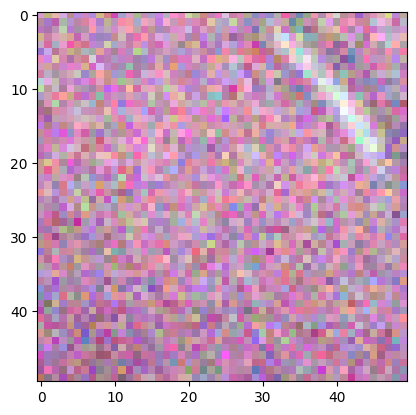

In [27]:
noise_gaussian_image = random_noise(gaussian_image)
plt.imshow(noise_gaussian_image)

In [38]:
#Processing using [random_noise] function
os.mkdir('Downloads//image_processing')
os.mkdir('Downloads//image_processing//noise_images')

In [39]:
for normal_image in os.listdir('Downloads//all_rays_dir') :
    path        = 'Downloads//all_rays_dir//'+ normal_image
    img         = mpimg.imread( path ,0)
    noise_image = random_noise(img)
    fname       = normal_image
    new_path    = os.path.join('Downloads//image_processing//noise_images',fname)
    mpimg.imsave(new_path, noise_image)

In [46]:

#os.mkdir( 'Downloads//image_processing//processd_data_train')
#os.mkdir( 'Downloads//image_processing//processd_data_train')
#os.mkdir( 'Downloads//image_processing//processd_data_test')
#os.mkdir( 'Downloads//image_processing//processd_data_test')

os.mkdir( 'Downloads//image_processing//processd_data_train//zeros')
os.mkdir( 'Downloads//image_processing//processd_data_train//ones')
os.mkdir( 'Downloads//image_processing//processd_data_test//zeros')
os.mkdir( 'Downloads//image_processing//processd_data_test//ones')


In [47]:
processd_lst = os.listdir('Downloads//image_processing//noise_images')
processd_lst_str = 'Downloads//image_processing//noise_images'
processd_data = pd.DataFrame(os.listdir('Downloads//image_processing//noise_images'), columns=['image_id'])
processd_data.head()

image_id
0   10286_idx5_x1251_y351_class1.png
1  14079_idx5_x2151_y1401_class0.png
2   12749_idx5_x1451_y701_class0.png
3   14157_idx5_x1651_y301_class0.png
4   10269_idx5_x1351_y651_class1.png

In [48]:
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target

processd_data['target'] = processd_data['image_id'].apply(extract_target)

processd_data.head(10)

image_id target
0   10286_idx5_x1251_y351_class1.png      1
1  14079_idx5_x2151_y1401_class0.png      0
2   12749_idx5_x1451_y701_class0.png      0
3   14157_idx5_x1651_y301_class0.png      0
4   10269_idx5_x1351_y651_class1.png      1
5    9266_idx5_x1901_y701_class0.png      0
6  13693_idx5_x1901_y2851_class0.png      0
7  13022_idx5_x1501_y1001_class0.png      0
8  10307_idx5_x1351_y1801_class1.png      1
9  15510_idx5_x1801_y1001_class0.png      0

In [49]:
processd_data['target'].value_counts()

0    198738
1     78786
Name: target, dtype: int64

In [55]:
os.mkdir( 'Downloads//image_processing//noise_images/image_id')

In [66]:
#processd_data.set_index('image_id', inplace=True)
label = ''
for image,tt in zip(processd_data['image_id'],processd_data['target']):
    fname = image
    #target = data.loc[image,'target']
    target = tt
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(processd_lst_str, fname)
    dst = os.path.join("Downloads//image_processing//processd_data_test", label, fname)
    shutil.copyfile(src, dst)

In [67]:
label = ''
for image,tt in zip(processd_data['image_id'],processd_data['target']):
    fname = image
    #target = data.loc[image,'target']
    target = tt
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(processd_lst_str, fname)
    dst = os.path.join("Downloads//image_processing//processd_data_train", label, fname)
    shutil.copyfile(src, dst)

In [68]:
print(len(os.listdir('Downloads//image_processing//processd_data_train//zeros')))
print(len(os.listdir('Downloads//image_processing//processd_data_train//ones')))
print(len(os.listdir('Downloads//image_processing//processd_data_test//zeros')))
print(len(os.listdir('Downloads//image_processing//processd_data_test//ones')))

198738
78786
198738
78786


In [81]:
#the images we processed and the noraml are tested on the same model to see which the best in the accuracy
#os.mkdir( 'Downloads//image_processing//model_tst')
#os.mkdir( 'Downloads//image_processing//model_tst')
#os.mkdir( 'Downloads//image_processing//model_tst')
#os.mkdir( 'Downloads//image_processing//model_tst')

#os.mkdir( 'Downloads//image_processing//model_tst//trainig')
#os.mkdir( 'Downloads//image_processing//model_tst//trainig')
#os.mkdir( 'Downloads//image_processing//model_tst//testing')
#os.mkdir( 'Downloads//image_processing//model_tst//testing')

os.mkdir( 'Downloads//image_processing//model_tst//trainig//zeros')
os.mkdir( 'Downloads//image_processing//model_tst//trainig//ones')
os.mkdir( 'Downloads//image_processing//model_tst//testing//zeros')
os.mkdir( 'Downloads//image_processing//model_tst//testing//ones')

In [82]:
df_0 = processd_data[processd_data['target'] == '0'].sample(10000, random_state=101)
df_1 = processd_data[processd_data['target'] == '1'].sample(10000, random_state=101)
test_data =pd.DataFrame(data)
test_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
test_y = test_data['target']
test_data_train, test_data_test = train_test_split(test_data, test_size=0.10, random_state=101, stratify=test_y)
sts_train = test_data_train.image_id
tst_test  = test_data_test.image_id
test_data.set_index('image_id', inplace=True)
for image in sts_train:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('Downloads//image_processing//model_tst//trainig', label, fname)
    shutil.copyfile(src, dst)
for image in tst_test:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('Downloads//image_processing//model_tst//testing', label, fname)
    shutil.copyfile(src, dst)    

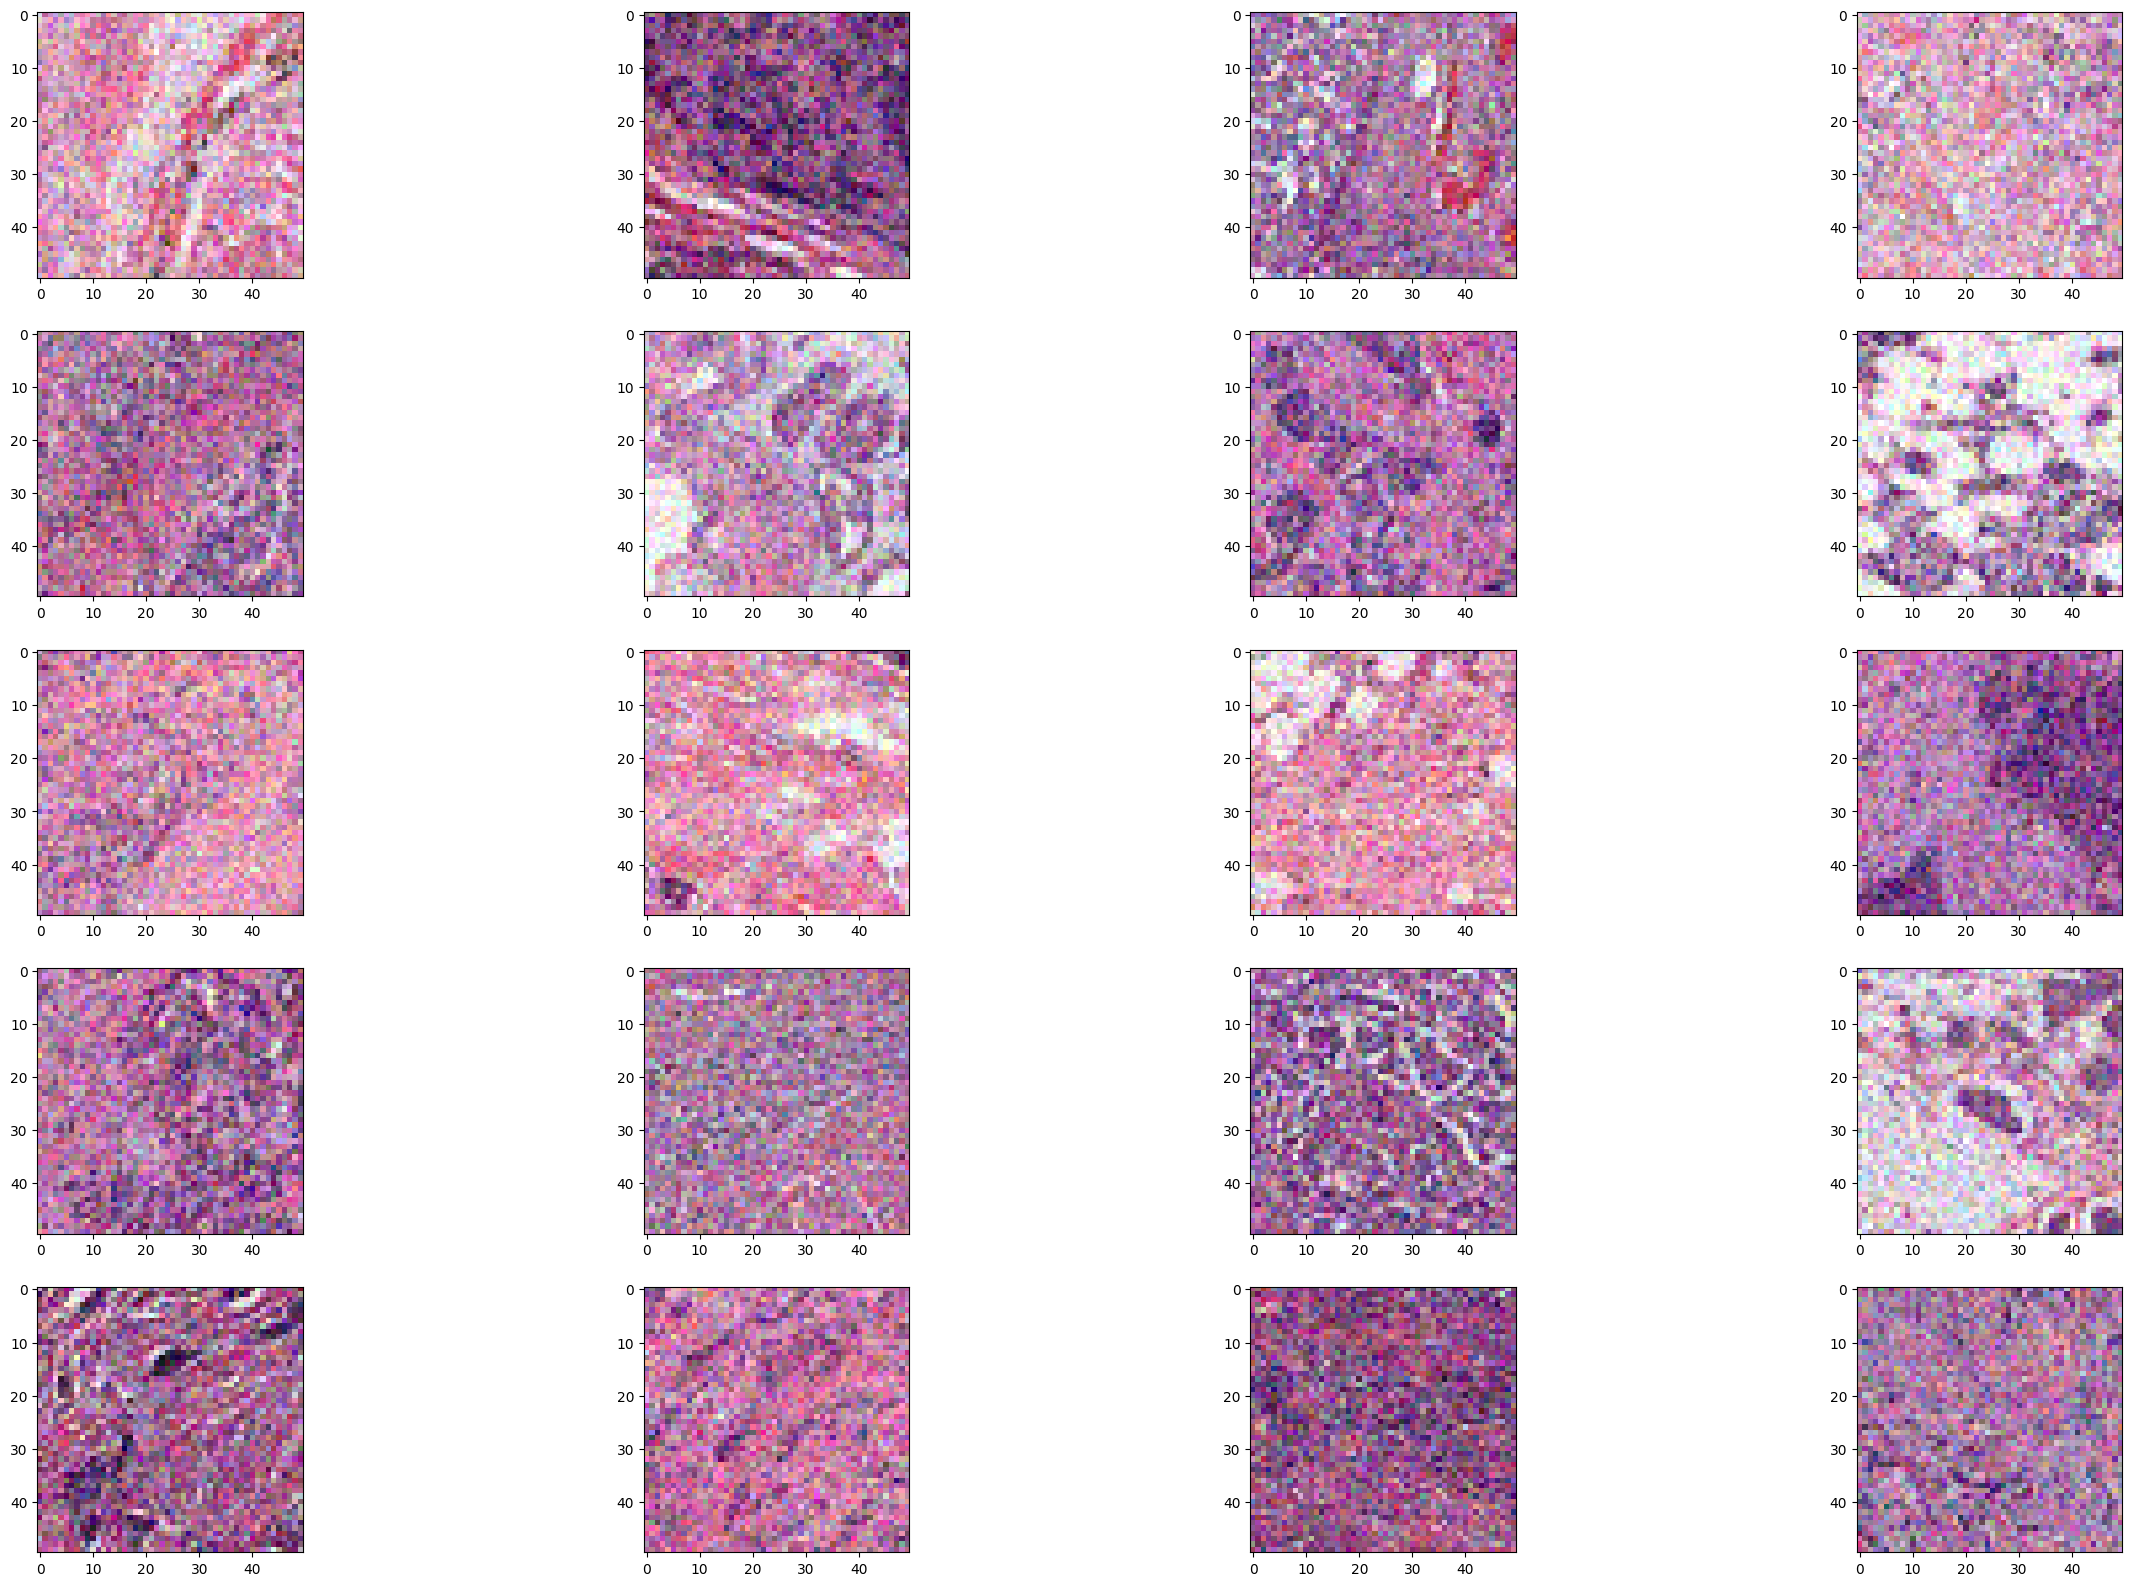

In [83]:
processd_data.target = processd_data.target.astype(np.int)
fig, ax = plt.subplots(5,4,figsize=(30,20))
pos_selection = np.random.choice(processd_data[processd_data.target==1].index.values, size=20, replace=False)
neg_selection = np.random.choice(processd_data[processd_data.target==0].index.values, size=20, replace=False)
for n in range(5):
    for m in range(4):
        idx = pos_selection[m + 4*n]
        path =os.path.join(processd_lst_str,processd_data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

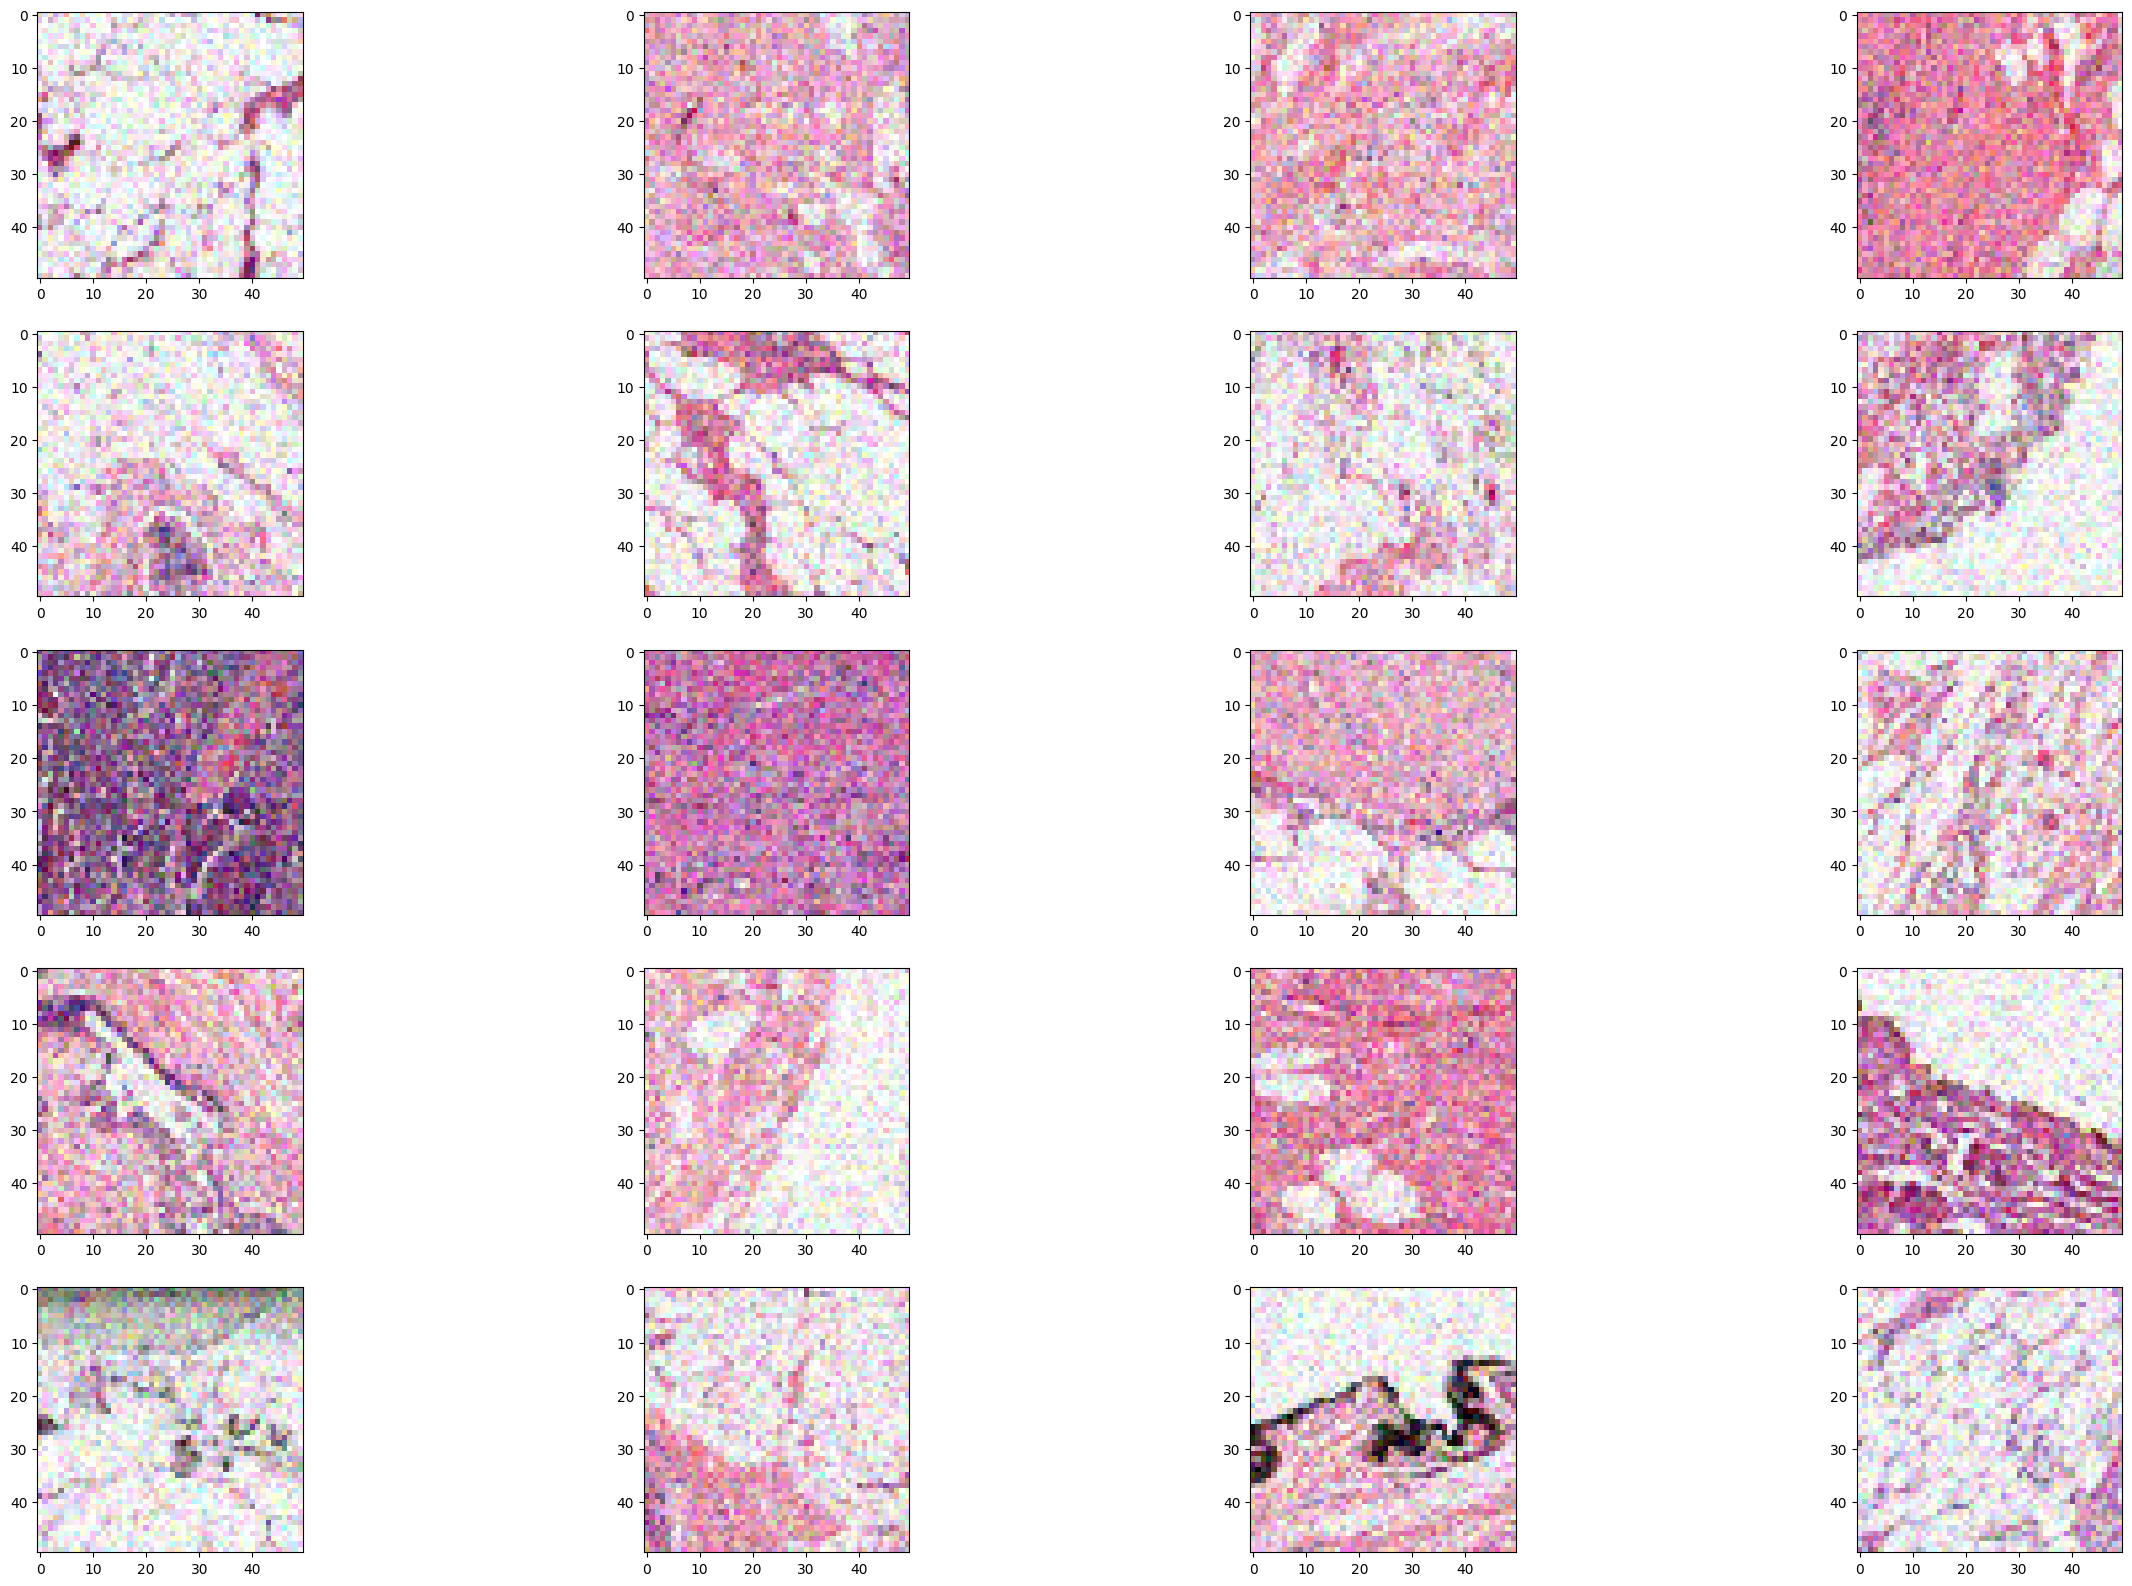

In [84]:
fig, ax = plt.subplots(5,4,figsize=(30,20))
for n in range(5):
    for m in range(4):
        idx = neg_selection[m + 4*n]
        path =os.path.join(processd_lst_str,processd_data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

In [85]:
data_processd_test_generation = ImageDataGenerator(rescale=1.0/255)
train_generation_processd = data_processd_test_generation.flow_from_directory("Downloads//image_processing//model_tst//trainig", target_size=(50,50), batch_size=10,class_mode='categorical')
test_generation_processd = data_processd_test_generation.flow_from_directory("Downloads//image_processing//model_tst//testing",target_size=(50,50),batch_size=10,class_mode='categorical')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [86]:
my_model_im_processd =Sequential()
my_model_im_processd.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
my_model_im_processd.add(MaxPool2D(pool_size=(2,2)))


my_model_im_processd.add(Flatten())

my_model_im_processd.add(Dense(128,activation='relu'))

my_model_im_processd.add(Dense(2,activation='softmax'))

my_model_im_processd.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

2022-11-19 11:59:43.271307: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [87]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
my_model_im_processd.fit_generator(train_generation_processd,validation_data=test_generation_processd,epochs=60, verbose=1,callbacks=early_stop)

Epoch 1/60
1800/1800 [==============================] - 61s 33ms/step - loss: 0.5440 - accuracy: 0.7414 - val_loss: 0.5702 - val_accuracy: 0.7380
Epoch 2/60
1800/1800 [==============================] - 59s 33ms/step - loss: 0.4953 - accuracy: 0.7747 - val_loss: 0.5020 - val_accuracy: 0.7715
Epoch 3/60
1800/1800 [==============================] - 58s 32ms/step - loss: 0.4763 - accuracy: 0.7887 - val_loss: 0.5150 - val_accuracy: 0.7605
Epoch 4/60
1800/1800 [==============================] - 58s 32ms/step - loss: 0.4746 - accuracy: 0.7867 - val_loss: 0.4702 - val_accuracy: 0.7920
Epoch 5/60
1800/1800 [==============================] - 56s 31ms/step - loss: 0.4530 - accuracy: 0.7998 - val_loss: 0.4501 - val_accuracy: 0.7990
Epoch 6/60
1800/1800 [==============================] - 57s 32ms/step - loss: 0.4263 - accuracy: 0.8143 - val_loss: 0.4471 - val_accuracy: 0.8080
Epoch 7/60
1800/1800 [==============================] - 57s 32ms/step - loss: 0.4068 - accuracy: 0.8234 - val_loss: 0.4442 -

In [88]:
#Now to process the normal images
os.mkdir( 'Downloads//image_processing//normal')
os.mkdir( 'Downloads//image_processing//normal//model_tst') 
os.mkdir( 'Downloads//image_processing//normal//model_tst//trainig')
os.mkdir( 'Downloads//image_processing//normal//model_tst//testing')
os.mkdir( 'Downloads//image_processing//normal//model_tst//trainig//zeros')
os.mkdir( 'Downloads//image_processing//normal//model_tst//trainig//ones')
os.mkdir( 'Downloads//image_processing//normal//model_tst//testing//zeros')
os.mkdir( 'Downloads//image_processing//normal//model_tst//testing//ones')

In [94]:
data = pd.DataFrame(os.listdir('Downloads//all_rays_dir'), columns=['image_id'])
data.head()

image_id
0   10286_idx5_x1251_y351_class1.png
1  14079_idx5_x2151_y1401_class0.png
2   12749_idx5_x1451_y701_class0.png
3   14157_idx5_x1651_y301_class0.png
4   10269_idx5_x1351_y651_class1.png

In [95]:
#This function extracts the target label from the image, we are going to use this 
#target to predict the class of the image 
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5] 
    return target


#applying the extract_target function and creating another column called 'target'
data['target'] = data['image_id'].apply(extract_target)

#displaying the first ten (10) data
data.head(10)

image_id target
0   10286_idx5_x1251_y351_class1.png      1
1  14079_idx5_x2151_y1401_class0.png      0
2   12749_idx5_x1451_y701_class0.png      0
3   14157_idx5_x1651_y301_class0.png      0
4   10269_idx5_x1351_y651_class1.png      1
5    9266_idx5_x1901_y701_class0.png      0
6  13693_idx5_x1901_y2851_class0.png      0
7  13022_idx5_x1501_y1001_class0.png      0
8  10307_idx5_x1351_y1801_class1.png      1
9  15510_idx5_x1801_y1001_class0.png      0

In [96]:

df_0 = data[data['target'] == '0'].sample(10000, random_state=101)
df_1 = data[data['target'] == '1'].sample(10000, random_state=101)
test_data =pd.DataFrame(data)
test_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
test_y = test_data['target']
test_data_train, test_data_test = train_test_split(test_data, test_size=0.10, random_state=101, stratify=test_y)
sts_train = test_data_train.image_id
tst_test  = test_data_test.image_id
test_data.set_index('image_id', inplace=True)
for image in sts_train:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('Downloads//image_processing//normal//model_tst//trainig', label, fname)
    shutil.copyfile(src, dst)
for image in tst_test:
    fname  = image
    target = test_data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('Downloads//image_processing//normal//model_tst//testing', label, fname)
    shutil.copyfile(src, dst) 

In [97]:
data_normal_test_generation = ImageDataGenerator(rescale=1.0/255)
train_generation_normal = data_normal_test_generation.flow_from_directory("Downloads//image_processing//normal//model_tst//trainig", target_size=(50,50), batch_size=10,class_mode='categorical')
test_generation_normal = data_normal_test_generation.flow_from_directory("Downloads//image_processing//normal//model_tst//testing",target_size=(50,50),batch_size=10,class_mode='categorical')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [98]:
my_model_im_norm =Sequential()
my_model_im_norm.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
my_model_im_norm.add(MaxPool2D(pool_size=(2,2)))


my_model_im_norm.add(Flatten())

my_model_im_norm.add(Dense(128,activation='relu'))
my_model_im_norm.add(Dense(2,activation='softmax'))

my_model_im_norm.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [99]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
my_model_im_processd.fit_generator(train_generation_normal,validation_data=test_generation_normal,epochs=60, verbose=1,callbacks=early_stop)

Epoch 1/60
1800/1800 [==============================] - 62s 34ms/step - loss: 0.3185 - accuracy: 0.8680 - val_loss: 0.5204 - val_accuracy: 0.7745
Epoch 2/60
1800/1800 [==============================] - 59s 33ms/step - loss: 0.2787 - accuracy: 0.8886 - val_loss: 0.5818 - val_accuracy: 0.7755
Epoch 3/60
1800/1800 [==============================] - 58s 32ms/step - loss: 0.2491 - accuracy: 0.9013 - val_loss: 0.6596 - val_accuracy: 0.7700


In [100]:
#I will be using the normal data since it is better 
#now I am going to perform data splitting and generation
y = data['target']
data_train, data_test = train_test_split(data, test_size=0.10, random_state=101, stratify=y)

In [101]:
print(data_train.shape)
print(data_test.shape)

(249771, 2)
(27753, 2)


In [111]:
os.mkdir( 'Downloads//train_dir')
os.mkdir('Downloads//test_dir')

In [112]:
os.mkdir( 'Downloads//train_dir//zeros')
os.mkdir( 'Downloads//train_dir//ones')

os.mkdir( 'Downloads//test_dir//zeros')
os.mkdir( 'Downloads//test_dir//ones')

In [113]:
train = data_train.image_id
test  = data_test.image_id

In [114]:
data.set_index('image_id', inplace=True)
for image in train:
    fname  = image
    target = data.loc[image,'target']
    
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('Downloads//train_dir', label, fname)
    shutil.copyfile(src, dst)

In [115]:
for image in test:
    fname = image
    target = data.loc[image,'target']
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join("Downloads//test_dir", label, fname)
    shutil.copyfile(src, dst)

In [116]:
print('non-IDC train      =',len(os.listdir('Downloads//train_dir//zeros')))
print('IDC train          =',len(os.listdir('Downloads//train_dir//ones')))
print('non-IDC validation =',len(os.listdir('Downloads//test_dir//zeros')))
print('IDC validation     =',len(os.listdir('Downloads//test_dir//ones')))

non-IDC train      = 178864
IDC train          = 70907
non-IDC validation = 19874
IDC validation     = 7879


In [117]:
data_generation = ImageDataGenerator(rescale=1.0/255)

In [118]:
train_generation = data_generation.flow_from_directory(
                                        "Downloads//train_dir",
                                        target_size=(25,25),
                                        batch_size=10,
                                        class_mode='categorical')
test_generation = data_generation.flow_from_directory(
                                        "Downloads//test_dir",
                                        target_size=(25,25),
                                        batch_size=10,
                                        class_mode='categorical')

Found 249771 images belonging to 2 classes.
Found 27753 images belonging to 2 classes.


In [119]:
my_model =Sequential()
my_model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(25,25,3),activation='relu'))
my_model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(25,25,3),activation='relu'))
my_model.add(MaxPool2D(pool_size=(2,2)))
my_model.add(Dropout(.3))

my_model.add(Flatten())

my_model.add(Dense(256,activation='relu'))

my_model.add(Dense(2,activation='softmax'))

my_model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [120]:
my_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        1568      
                                                                 
 conv2d_3 (Conv2D)           (None, 19, 19, 32)        16416     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 9, 9, 32)          0         
                                                                 
 flatten_2 (Flatten)         (None, 2592)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               663808    
                                                      

In [121]:
my_model.fit_generator(train_generation,validation_data=test_generation,epochs=60, verbose=1,callbacks=early_stop)

Epoch 1/60
24978/24978 [==============================] - 843s 34ms/step - loss: 0.4169 - accuracy: 0.8205 - val_loss: 0.3761 - val_accuracy: 0.8442
Epoch 2/60
24978/24978 [==============================] - 918s 37ms/step - loss: 0.3804 - accuracy: 0.8389 - val_loss: 0.3616 - val_accuracy: 0.8459
Epoch 3/60
24978/24978 [==============================] - 840s 34ms/step - loss: 0.3693 - accuracy: 0.8438 - val_loss: 0.3679 - val_accuracy: 0.8433
Epoch 4/60
24978/24978 [==============================] - 832s 33ms/step - loss: 0.3654 - accuracy: 0.8457 - val_loss: 0.3684 - val_accuracy: 0.8447


In [122]:
losse = pd.DataFrame(my_model.history.history)
losse.head()

loss  accuracy  val_loss  val_accuracy
0  0.416898  0.820548  0.376145      0.844197
1  0.380437  0.838872  0.361558      0.845891
2  0.369282  0.843841  0.367875      0.843332
3  0.365445  0.845731  0.368389      0.844738

Text(0.5, 1.0, 'Accuracy VS Val_accuracy')

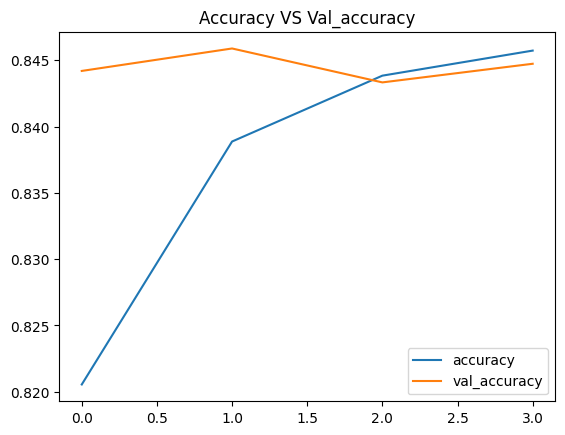

In [124]:
losse[['accuracy','val_accuracy']].plot()
plt.title("Accuracy VS Val_accuracy")

Text(0.5, 1.0, 'Loss VS Val_loss')

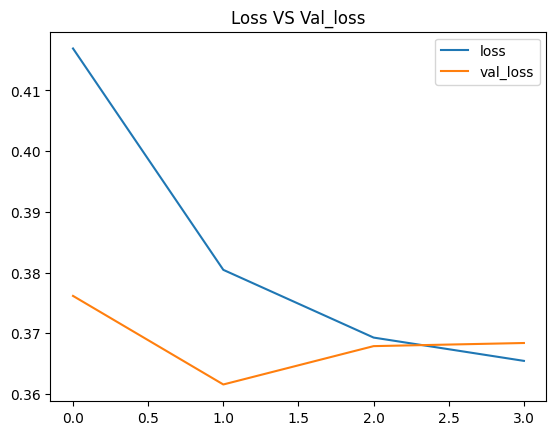

In [125]:
losse[['loss','val_loss']].plot()
plt.title("Loss VS Val_loss")

In [126]:
val_loss, val_acc = \
my_model.evaluate_generator(test_generation)

print('val_loss:', val_loss)
print('val_acc:', val_acc)

val_loss: 0.36838892102241516
val_acc: 0.8447375297546387


In [127]:
model_json = my_model.to_json()

In [129]:
os.mkdir( 'Downloads//GUI')

In [130]:
with open("Downloads//GUI//model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
my_model.save_weights("Downloads//GUI//model.h5")
print("Saved model to disk")

Saved model to disk


In [133]:
json_file = open('Downloads//GUI//model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("Downloads//GUI//model.h5")
print("Loaded model from disk")
 
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Loaded model from disk


In [134]:
class Api_service :
    def __init__(self,img_file_path):
        self.img_file_path = img_file_path
    def prediction_function(self) :
        predict_generation = data_generation.flow_from_directory(
                                            self.img_file_path,
                                            target_size=(25,25),
                                            batch_size=10,
                                            class_mode='categorical')

        prediction = loaded_model.predict_generator(predict_generation)
        has_cancer = 'The percentage of cancer : '+ str(round(prediction[0][1]*100,2)) + "%"
        has_no_cancer='Percentage of no cancer : ' + str(round(prediction[0][0]*100,2)) + '%'
        return has_cancer,has_no_cancer 

In [137]:
os.mkdir( 'Downloads//predict')

In [150]:
prediction = Api_service("Downloads//predict")
x,y        = prediction.prediction_function()
print(x)
print(y)

Found 1 images belonging to 1 classes.
The percentage of cancer : 99.07%
Percentage of no cancer : 0.93%
